<table style="width:100%; text-align:center;">
  <tr>
    <td style="width:33%;">
      <a href="https://highway.esa.int/">
        <img src="./img/highway_logo.svg" alt="HIGHWAY Logo" width="150">
      </a>
    </td>
    <td style="width:34%;">
    </td>
    <td style="width:33%;">
      <a href="https://www.esa.int/">
        <img src="./img/ESA_logo_2020_White.png" alt="ESA Logo" width="150">
      </a>
    </td>
  </tr>
</table>


# Advance Data Access - WMS

This Jupyter notebook provides a step-by-step guide to accessing data via the Web Map Service (WMS) interface offered by the HIGHWAY data services. It demonstrates how to authenticate, construct WMS requests, and retrieve geospatial imagery.


## Import the required libraries


In [1]:
import requests
import matplotlib.pyplot as plt
import getpass
from lib.HIGHWAY_auth import connection_desp

from PIL import Image
from io import BytesIO
from urllib.parse import urlparse, parse_qs, urlencode, urlunparse


## Authentication
The authentication is performed through the DESP platform: the user provides their credentials to obtain a DESP token, which is then exchanged for a HIGHWAY-specific access token. This token enables secure access to the HIGHWAY APIs.

In [2]:

username = getpass.getpass('Type your username : ')
password = getpass.getpass('Type your password : ')

access_token = connection_desp(username, password)


## Define code Parameters

In this step, we define a set of configurable variables used to query the HIGHWAY API.
These parameters—such as the dataset identifier, date range, and pagination controls which can be easily adapted to match your specific data requirements.


In [3]:
endpoint = "https://ds.highway.esa.int/ada"
datasetId = 'HIGHWAY_L3_SIT_Open_MIR_SIT_3C'

maxRecords = '10'
start_index = '0'
start_date = '2025-05-01T00:00:00Z'
end_date = '2025-06-01T00:00:00Z'


## Query the OpenSearch API for Products
In this step, we call the OpenSearch API to search for available products that match the defined criteria. This allows us to retrieve metadata and access links for the relevant datasets.



In [4]:
data = {
    "maxRecords": maxRecords,  # Payload for the POST request
    "startIndex": start_index,
    "startDate": start_date,
    "endDate": end_date
}

#-------------------running the POST request---------------------
getProducts = requests.post(endpoint + "/opensearch/search/" + datasetId, data=data)
results = getProducts.json()


## Perform the WMS Request
In this step, we use the WMS URL extracted from the OpenSearch results to request a geospatial image. To do this:
* We retrieve the WMS endpoint from the product metadata returned by the OpenSearch API.
* We append the required BBOX (bounding box) parameter to define the geographic area of interest.
* Finally, we execute the WMS request to obtain the corresponding map image.


In [5]:

wms_url = endpoint + '/wms' + results['features'][9]['subDatasets']['sea_ice_thickness']['wms']
parsed = urlparse(wms_url)
params = parse_qs(parsed.query)
params["bbox"] = ["-90,-180,90,180"] # add the bounding box
params["height"] = [512/2] # overwrite a parameter.
params["width"] = [512/2] # overwrite a parameter.
new_query = urlencode(params, doseq=True)
wms_url = urlunparse(parsed._replace(query=new_query))

headers = {
  'Authorization': 'Bearer ' + access_token
}

response = requests.get(wms_url, headers=headers)


## Display the Retrieved Image
In this final step, we render the image obtained from the WMS request.
This visualization marks the beginning of what you can build on top of this workflow—whether it’s for interactive exploration, automated reporting, or integration into a larger geospatial application.

Let your imagination guide the next steps!


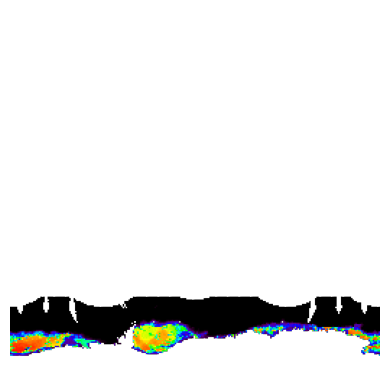

In [6]:
if response.status_code == 200:
    img = Image.open(BytesIO(response.content))
    plt.imshow(img)
    plt.axis('off')  # Optional: hide axes
    plt.show()
else:
    print("Failed to fetch image")



Code example provided by <a href='https://adwaiseo.eu/'>adwäisEO</a>

<table style="width:100%; text-align:center;">
  <tr>
    <td style="width:33%;">
      <a href="https://highway.esa.int/">
        <img src="./img/highway_logo.svg" alt="HIGHWAY Logo" width="150">
      </a>
    </td>
    <td style="width:34%;">
    </td>
    <td style="width:33%;">
      <a href="https://www.esa.int/">
        <img src="./img/ESA_logo_2020_White.png" alt="ESA Logo" width="150">
      </a>
    </td>
  </tr>
</table>
